In [1]:
%autosave 0

import os
import sys
import glob 
from functools import reduce
import seaborn as sb
import pandas as pd
import random

Autosave disabled


In [2]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
# display plots in the notebook
%matplotlib inline
# increase default figure and font sizes for easier viewing
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['font.size'] = 14

In [3]:
sys.path.append("../")
from simulation.data import Data
from simulation.utils import bar_range, pickle_load_obj

In [12]:
data = pickle_load_obj('../output/optimizer.pkl..')
NUM_BITMAPS = 30
NUM_TENANTS = 30
NUM_HOSTS_PER_LEAF = 48

In [13]:
data = Data(data, num_tenants=NUM_TENANTS, num_hosts_per_leaf=NUM_HOSTS_PER_LEAF, num_bitmaps=NUM_BITMAPS)

In [14]:
data.algorithm_elapse_time().describe()

count    985.000000
mean       0.000027
std        0.000069
min        0.000002
25%        0.000002
50%        0.000002
75%        0.000045
max        0.001185
dtype: float64

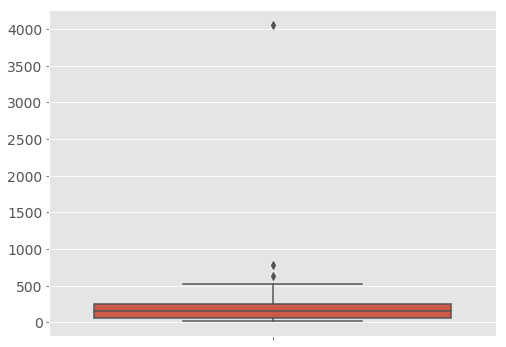

In [16]:
sb.boxplot(y=data.vm_count_per_tenant())

In [17]:
sum(data.vm_count_per_tenant())

9646

In [18]:
# sb.kdeplot(data.vm_count_for_all_tenants(), cumulative=True)

In [20]:
data.vm_count_per_tenant().describe()

count      30.000000
mean      321.533333
std       728.487935
min        11.000000
25%        63.250000
50%       150.000000
75%       248.250000
max      4053.000000
dtype: float64

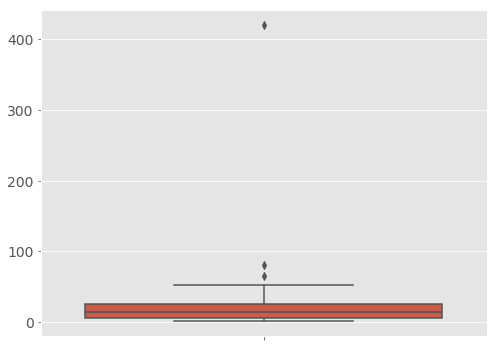

In [21]:
sb.boxplot(y=data.group_count_per_tenant())

In [12]:
# sb.kdeplot(data.group_count_for_all_tenants(), cumulative=True)

In [22]:
data.group_count_per_tenant().describe()

count     30.000000
mean      32.833333
std       75.579638
min        1.000000
25%        6.250000
50%       15.000000
75%       25.000000
max      420.000000
dtype: float64

data:group_size_per_group_per_tenant:: 100% |###################| Time: 0:00:00


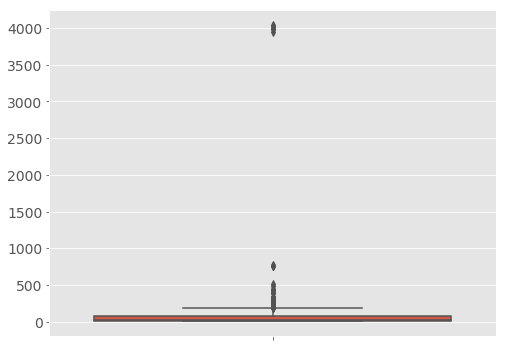

In [23]:
sb.boxplot(y=data.group_size_per_group_per_tenant())

In [15]:
# sb.kdeplot(data.group_sizes_for_all_tenants(), cumulative=True)

In [24]:
data.group_size_per_group_per_tenant().describe()

data:group_size_per_group_per_tenant:: 100% |###################| Time: 0:00:00


count     985.000000
mean       85.382741
std       318.802824
min         5.000000
25%        10.000000
50%        23.000000
75%        83.000000
max      4042.000000
dtype: float64

In [26]:
data.groups_covered_with_bitmaps_only()

data:groups_covered_with_bitmaps_only:: 100% |##################| Time: 0:00:00


0    600
dtype: int64

data:leaf_count_per_group_per_tenant:: 100% |###################| Time: 0:00:00


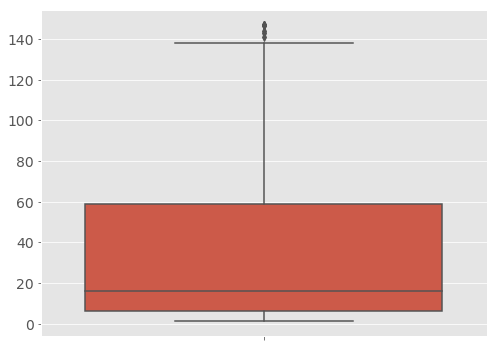

In [27]:
sb.boxplot(y=data.leaf_count_per_group_per_tenant())

In [18]:
# sb.kdeplot(data.leafs_for_all_groups_in_all_tenants(), cumulative=True)

In [28]:
data.leaf_count_per_group_per_tenant().describe()

data:leaf_count_per_group_per_tenant:: 100% |###################| Time: 0:00:00


count    985.000000
mean      35.474112
std       37.269694
min        1.000000
25%        6.000000
50%       16.000000
75%       59.000000
max      147.000000
dtype: float64

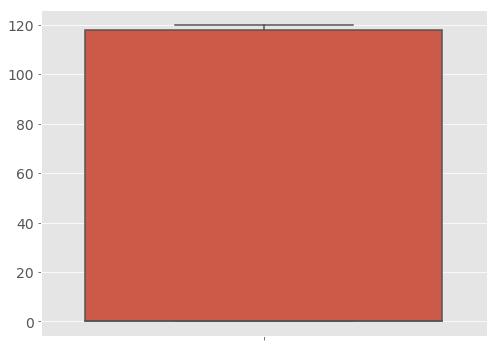

In [29]:
sb.boxplot(y=data.rule_count_per_leaf())

In [30]:
len(data.rule_count_per_leaf())

576

In [31]:
data.rule_count_per_leaf().describe()

count    576.000000
mean      30.418403
std       51.974779
min        0.000000
25%        0.000000
50%        0.000000
75%      118.000000
max      120.000000
dtype: float64

data:traffic_overhead_per_group_per_tenant:: 100% |#############| Time: 0:00:00


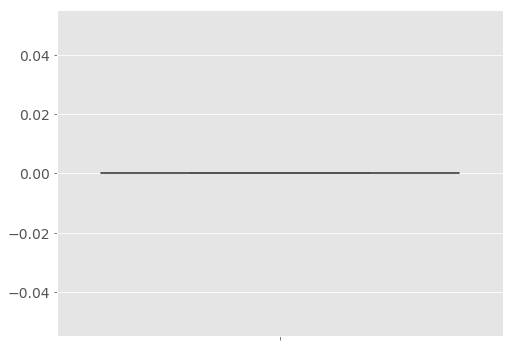

In [32]:
sb.boxplot(y=data.traffic_overhead_per_group_per_tenant())

In [26]:
# data.rules_for_all_groups_pre_optimization().describe()

In [27]:
# data.rules_for_all_groups_post_optimization().describe()

In [33]:
at_leaf, ut_leaf = data.traffic_stats()

data:traffic_stats:: 100% |#####################################| Time: 0:00:00


In [34]:
data.traffic_overhead(at_leaf, ut_leaf)

0    0.0
dtype: float64

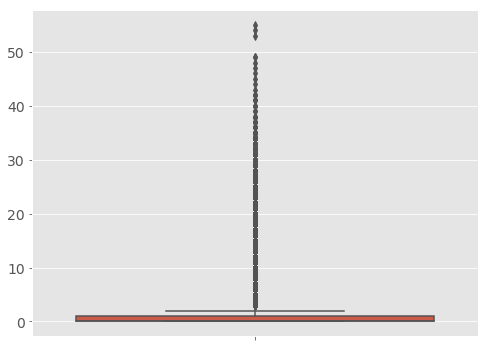

In [35]:
tt_link = data.total_traffic_per_link(at_leaf, ut_leaf)
sb.boxplot(y=tt_link)

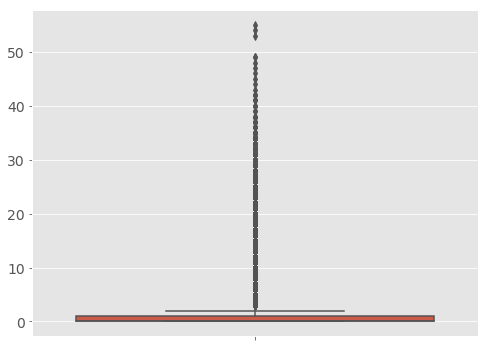

In [36]:
at_link = data.actual_traffic_per_link(at_leaf)
sb.boxplot(y=at_link)

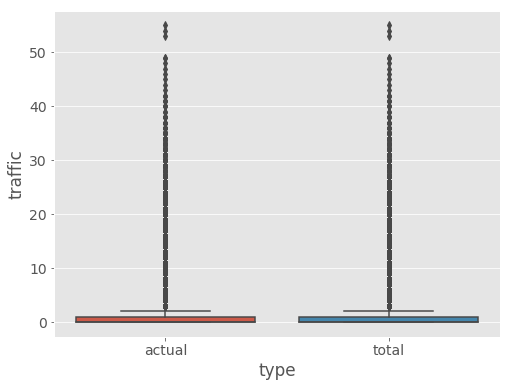

In [37]:
traffic_data = pd.DataFrame(columns=['type', 'traffic'])

at_data = pd.DataFrame()
at_data['type'] = ['actual' for _ in range(len(at_link))]
at_data['traffic'] = at_link
traffic_data = traffic_data.append(at_data)

tt_data = pd.DataFrame()
tt_data['type'] = ['total' for _ in range(len(tt_link))]
tt_data['traffic'] = tt_link
traffic_data = traffic_data.append(tt_data)

sb.boxplot(x='type', y='traffic', data=traffic_data)

In [38]:
to_link = data.traffic_overhead_per_link(tt_link, at_link)

data:traffic_overhead_per_link:: 100% |#########################| Time: 0:00:00


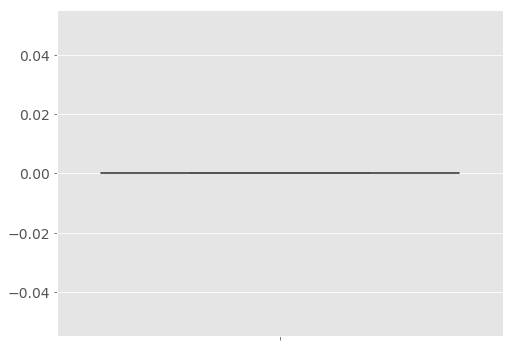

In [39]:
sb.boxplot(y=to_link)

In [40]:
to_link.describe()

count    27648.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
dtype: float64

In [42]:
data.leaf_spine_traffic_per_group_per_tenant_for_multicast().describe()

data:leaf_spine_traffic_per_group_per_tenant_for_multicast:: 100% || Time: 0:00:00-


count     985.000000
mean      120.982741
std       316.430297
min         8.000000
25%        18.000000
50%        41.000000
75%       148.000000
max      3911.000000
dtype: float64

In [43]:
data.leaf_spine_traffic_per_group_per_tenant_for_unicast().describe()

data:leaf_spine_traffic_per_group_per_tenant_for_unicast:: 100% || Time: 0:00:00-


count      985.000000
mean       334.034518
std       1192.552323
min         20.000000
25%         40.000000
50%         92.000000
75%        332.000000
max      15048.000000
dtype: float64

In [44]:
data.leaf_spine_traffic_per_group_per_tenant_for_overlay().describe()

data:leaf_spine_traffic_per_group_per_tenant_for_overlay:: 100% || Time: 0:00:00-


count     985.000000
mean      237.965482
std       632.860594
min        12.000000
25%        32.000000
50%        78.000000
75%       292.000000
max      7818.000000
dtype: float64

In [45]:
data.leaf_spine_traffic_per_group_per_tenant_for_baseerat().describe()

data:leaf_spine_traffic_per_group_per_tenant_for_baseerat:: 100% || Time: 0:00:00-


count     985.000000
mean      120.982741
std       316.430297
min         8.000000
25%        18.000000
50%        41.000000
75%       148.000000
max      3911.000000
dtype: float64

In [46]:
(sum(data.leaf_spine_traffic_per_group_per_tenant_for_unicast()) /
 sum(data.leaf_spine_traffic_per_group_per_tenant_for_multicast()))

data:leaf_spine_traffic_per_group_per_tenant_for_unicast:: 100% || Time: 0:00:00-
data:leaf_spine_traffic_per_group_per_tenant_for_multicast:: 100% || Time: 0:00:00-


2.7610096670247044

In [48]:
(sum(data.leaf_spine_traffic_per_group_per_tenant_for_overlay()) / 
 sum(data.leaf_spine_traffic_per_group_per_tenant_for_multicast()))

data:leaf_spine_traffic_per_group_per_tenant_for_overlay:: 100% || Time: 0:00:00-
data:leaf_spine_traffic_per_group_per_tenant_for_multicast:: 100% || Time: 0:00:00-


1.9669374328678839

In [49]:
(sum(data.leaf_spine_traffic_per_group_per_tenant_for_baseerat()) /
 sum(data.leaf_spine_traffic_per_group_per_tenant_for_multicast()))

data:leaf_spine_traffic_per_group_per_tenant_for_baseerat:: 100% || Time: 0:00:00-
data:leaf_spine_traffic_per_group_per_tenant_for_multicast:: 100% || Time: 0:00:00-


1.0